In [ ]:
from google.colab import drive
drive.mount('/mydrive')

Drive already mounted at /mydrive; to attempt to forcibly remount, call drive.mount("/mydrive", force_remount=True).


# Sentiment analysis of movie reviews

### The sentiment labels are:

* 0 - negative
* 1 - somewhat negative
* 2 - neutral
* 3 - somewhat positive
* 4 - positive

The dataset is comprised of tab-separated files with phrases from the Rotten Tomatoes dataset. The train/test split has been preserved for the purposes of benchmarking, but the sentences have been shuffled from their original order. Each Sentence has been parsed into many phrases by the Stanford parser. Each phrase has a PhraseId. Each sentence has a SentenceId. Phrases that are repeated (such as short/common words) are only included once in the data.

* train.tsv contains the phrases and their associated sentiment labels. We have additionally provided a SentenceId so that you can track which phrases belong to a single sentence.
* test.tsv contains just phrases. You must assign a sentiment label to each phrase.

In [ ]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
%matplotlib inline

In [ ]:
train = pd.read_csv('/mydrive/My Drive/hackathon/sentiment/train.csv',sep='\t')
test = pd.read_csv('/mydrive/My Drive/hackathon/sentiment/test.csv',sep='\t')

In [ ]:
train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [ ]:
train.iloc[0][2]

'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .'

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [ ]:
train.shape

(156060, 4)

In [ ]:
train['SentenceId'].value_counts().sort_index()

1       63
2       18
3       35
4       40
5       10
        ..
8540    13
8541    24
8542    10
8543     8
8544    21
Name: SentenceId, Length: 8529, dtype: int64

In [ ]:
import re

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
def stpwrds(x):
    strip = re.sub('[^a-zA-Z]'," ",x)
    text = strip.split()
    word = [w.lower() for w in text if not w in stopwords.words('english')]
    return " ".join(word)

In [ ]:
stpwrds(train.iloc[0][2])

'a series escapades demonstrating adage good goose also good gander occasionally amuses none amounts much story'

In [ ]:
train['Phrase'] = train['Phrase'].apply(stpwrds)

In [ ]:
def rp(x):
    if x == '':
        return np.nan
    else:
        return x

In [ ]:
train['Phrase'] = train['Phrase'].apply(rp)

In [ ]:
train.isnull().sum()

PhraseId         0
SentenceId       0
Phrase        1303
Sentiment        0
dtype: int64

In [ ]:
train.dropna(inplace=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154757 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    154757 non-null  int64 
 1   SentenceId  154757 non-null  int64 
 2   Phrase      154757 non-null  object
 3   Sentiment   154757 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 5.9+ MB


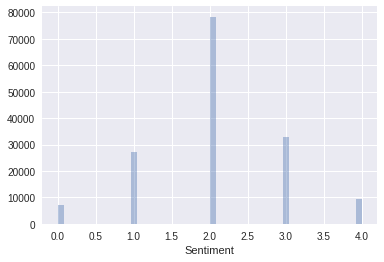

In [ ]:
sns.distplot(train['Sentiment'],kde=False)

In [ ]:
from collections import Counter
count = Counter()

In [ ]:
# count unique words
def count_words(x):
    for i in x.values:
        for word in i.split():
            count[word] +=1
    return count

In [ ]:
text = train.Phrase

In [ ]:
counter = count_words(text)

In [ ]:
#counter

In [ ]:
len(counter)

15104

In [ ]:
num_words = len(counter)

max_len = 20

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train['Phrase'],train['Sentiment'], test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf

In [ ]:
tokens = tf.keras.preprocessing.text.Tokenizer(num_words=num_words)


In [ ]:
tokens.fit_on_texts(X_train)

In [ ]:
word_index = tokens.word_index

In [ ]:
train_sequences = tokens.texts_to_sequences(X_train)

In [ ]:
train_sequences[20]

[873, 14371, 592, 30, 1875, 30, 23, 33, 172, 8289, 793, 1449]

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
train_padded = pad_sequences(train_sequences,maxlen=max_len,padding='post',truncating='post')

In [ ]:
x,y = SMOTE().fit_resample(train_padded,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
train_padded[1]

array([11808,  3370,  3701, 13707,  2662,    12,  1047,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0], dtype=int32)

In [ ]:
test_sequences = tokens.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences,maxlen=max_len,padding='post',truncating='post')

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, LSTM, Embedding, Dense
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Embedding(num_words,32,input_length=max_len))
model.add(LSTM(64,dropout=0.1))
model.add(Dense(64,activation='relu'))
model.add(Dense(5,activation='sigmoid'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 32)            483328    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                24832     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 325       
Total params: 512,645
Trainable params: 512,645
Non-trainable params: 0
_________________________________________________________________


In [ ]:
with tf.device('/device:GPU:1'):
  model.fit(x,y,epochs=30,batch_size=64,validation_data=(test_padded,y_test))

Epoch 1/30
4901/4901 [==============================] - 39s 8ms/step - loss: 1.2796 - accuracy: 0.4804 - val_loss: 1.1806 - val_accuracy: 0.6135
Epoch 2/30
4901/4901 [==============================] - 38s 8ms/step - loss: 1.1889 - accuracy: 0.5122 - val_loss: 1.2207 - val_accuracy: 0.5835
Epoch 3/30
4901/4901 [==============================] - 40s 8ms/step - loss: 1.1333 - accuracy: 0.5325 - val_loss: 1.1376 - val_accuracy: 0.6080
Epoch 4/30
4901/4901 [==============================] - 40s 8ms/step - loss: 1.0943 - accuracy: 0.5465 - val_loss: 1.1285 - val_accuracy: 0.6133
Epoch 5/30
4901/4901 [==============================] - 39s 8ms/step - loss: 1.0638 - accuracy: 0.5571 - val_loss: 1.2150 - val_accuracy: 0.5952
Epoch 6/30
4901/4901 [==============================] - 39s 8ms/step - loss: 1.0386 - accuracy: 0.5673 - val_loss: 1.1832 - val_accuracy: 0.5944
Epoch 7/30
4901/4901 [==============================] - 39s 8ms/step - loss: 1.0168 - accuracy: 0.5770 - val_loss: 1.2178 - val_ac

In [ ]:
model.evaluate(test_padded,y_test)

968/968 [==============================] - 3s 3ms/step - loss: 1.3329 - accuracy: 0.6420


[1.3329331874847412, 0.641994059085846]

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,model.predict_classes(test_padded)))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[[  635   655   149    17     4]
 [  581  2809  1857   157    19]
 [  138  1557 12059  1757   130]
 [   26   147  2139  3541   747]
 [    3     6   111   881   827]]
